In [77]:
# %pip install -q tensorflow

In [78]:
import tensorflow as tf
from keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [79]:
(imagens_treino, label_treino), (imagens_test, label_test) = (
    datasets.cifar10.load_data()
)

In [80]:
nomes_class = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [81]:
def visualizar_imagens(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(nomes_class[labels[i][0]])
    plt.show()

In [82]:
imagens_treino = imagens_treino / 255.0
imagens_test = imagens_test / 255.0

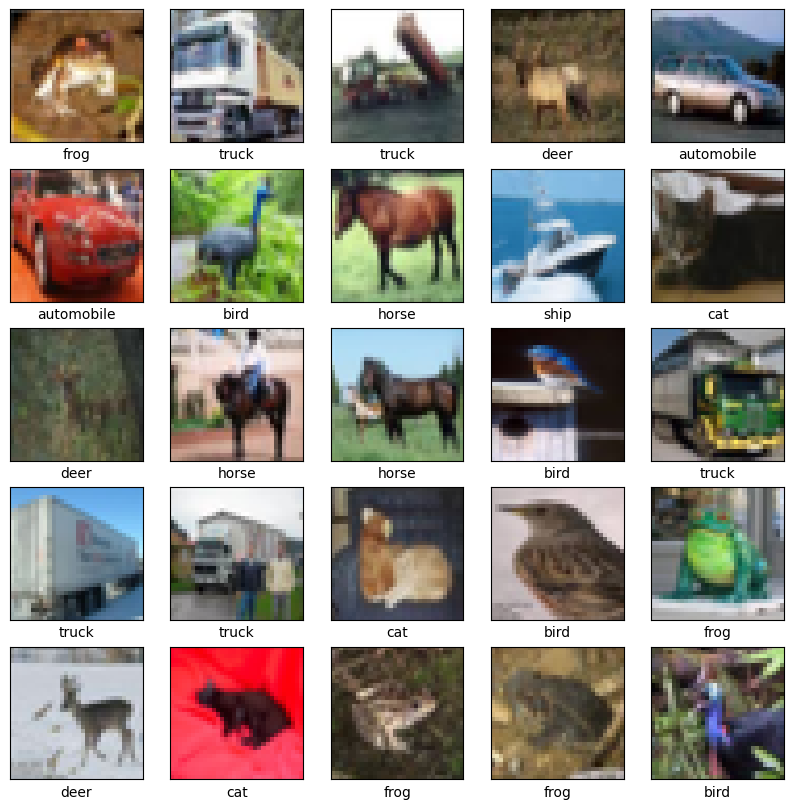

In [83]:
visualizar_imagens(imagens_treino, label_treino)

In [84]:
modelo_deep = models.Sequential()

modelo_deep.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
modelo_deep.add(layers.MaxPooling2D(2, 2))

modelo_deep.add(layers.Conv2D(64, (3, 3), activation="relu"))
modelo_deep.add(layers.MaxPooling2D(2, 2))

modelo_deep.add(layers.Conv2D(64, (3, 3), activation="relu"))
modelo_deep.add(layers.MaxPooling2D(2, 2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
modelo_deep.add(layers.Flatten())
modelo_deep.add(layers.Dense(64, activation="relu"))
modelo_deep.add(layers.Dense(len(nomes_class) + 1, activation="softmax"))

In [86]:
modelo_deep.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 11)                  │             715 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,483 (287.04 KB)

 Trainable params: 73,483 (287.04 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
modelo_deep.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [88]:
%%time
history = modelo_deep.fit(imagens_treino, label_treino, epochs= 10, validation_data=(imagens_test, label_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3162 - loss: 1.8388 - val_accuracy: 0.5255 - val_loss: 1.3034
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5492 - loss: 1.2624 - val_accuracy: 0.5757 - val_loss: 1.1872
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6066 - loss: 1.1129 - val_accuracy: 0.5998 - val_loss: 1.1352
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6424 - loss: 1.0126 - val_accuracy: 0.6308 - val_loss: 1.0481
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6723 - loss: 0.9393 - val_accuracy: 0.6611 - val_loss: 0.9694
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6920 - loss: 0.8769 - val_accuracy: 0.6668 - val_loss: 0.9554
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7151 - loss: 0.8253 - val_accuracy: 0.6732 - val_loss: 0.9447
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7264 - loss: 0.7815

In [89]:
erro_teste, acc_teste = modelo_deep.evaluate(imagens_test, label_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.7014 - loss: 0.8787


## Deploy

In [91]:
nova_imagem = Image.open('nova_imagem.jpg')

In [92]:
nova_imagem.size

(1919, 1199)

In [93]:
largura = nova_imagem.width
height = nova_imagem.height

In [94]:
imagem_redimencionada = nova_imagem.resize((32, 32))

In [95]:
imagem_redimencionada.size

(32, 32)

([], [])

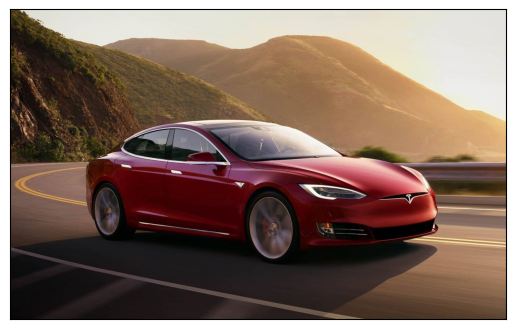

In [96]:
plt.figure()
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])

In [97]:
image_normalizada_array = np.array(imagem_redimencionada) / 255.0
image_normalizada_array = np.expand_dims(imagem_redimencionada, axis=0)

In [98]:
previsao = modelo_deep.predict(image_normalizada_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


In [99]:
previsao

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [100]:
classe_previa = np.argmax(previsao)
nomes_class[classe_previa]

'automobile'